In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# import sys
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams.update({
    "lines.color": "black",
    "patch.edgecolor": "black",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "black",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "grid.color": "white",
    "figure.facecolor": "white",
    "figure.edgecolor": "white",
    "savefig.facecolor": "white",
    "savefig.edgecolor": "white",
    "font.size": 25})

In [11]:
real_df = pd.read_csv("lifeTimes_real.csv")
prediction_df = pd.read_csv("lifeTimes.csv")

In [13]:
error_agg = 0
error_count = 0
real, real_sus = [], []
pred, pred_sus = [], []
for index, row in real_df.iterrows():
    real_life_time = row['life_time']
    predicted_life_time = prediction_df.iloc[index]['life_time']
    if real_life_time == -1:
        real_sus.append(real_life_time)
        pred_sus.append(predicted_life_time)
        continue
    real.append(real_life_time)
    pred.append(predicted_life_time)
    error_agg += np.abs(real_life_time - predicted_life_time) / real_life_time
    error_count += 1

In [14]:
print(error_agg / error_count)
print(error_count)
print(np.average(real))

0.5143035267605689
508
13738.720697923707


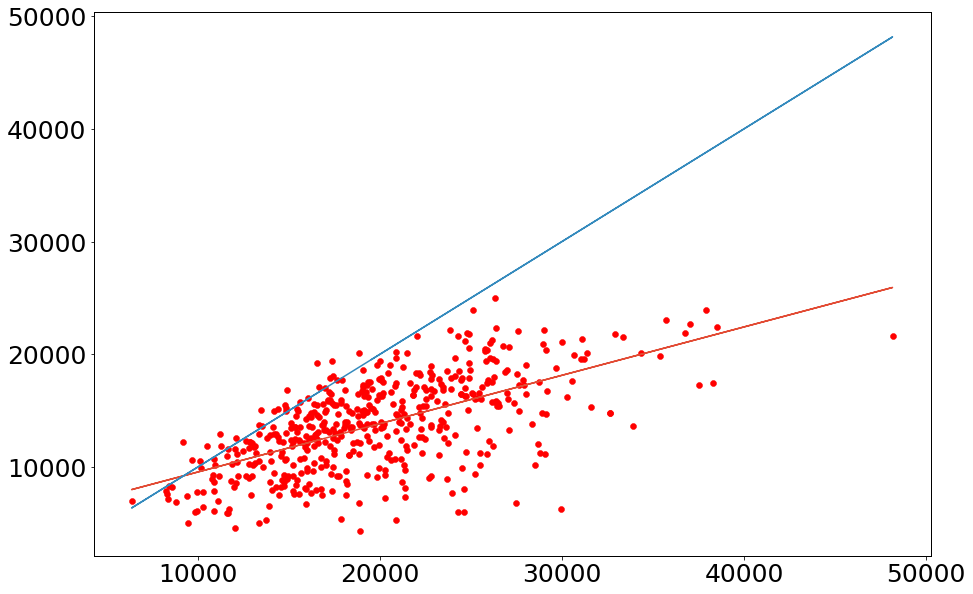

slop is  0.42906593782871916
b is  5263.733182033318


In [16]:
plt.scatter(pred, real, color='r')
plt.scatter(pred_sus, real_sus, color='g')
m, b = np.polyfit(np.array(pred), np.array(real), 1)
plt.plot(np.array(pred), m*np.array(pred) + b)
plt.plot(np.array(pred), 1*np.array(pred) + 0)
plt.show()
print ("slop is ", m)
print ("b is ", b)

In [7]:
error_agg = 0
error_count = 0
real = []
pred = []
for index, row in real_df.iterrows():
    real_life_time = row['life_time']
    predicted_life_time = prediction_df.iloc[index]['life_time']
    if real_life_time == -1 or predicted_life_time > 15000:
        continue
    real.append(real_life_time)
    pred.append(predicted_life_time)
    error_agg += np.abs(real_life_time - predicted_life_time) / real_life_time
    error_count += 1

In [8]:
print(error_agg / error_count)
print(error_count)
print(np.average(real))

0.33527530999116467
103
10053.732435043647


slop is  0.6206689251848331
b is  2333.0420365773025


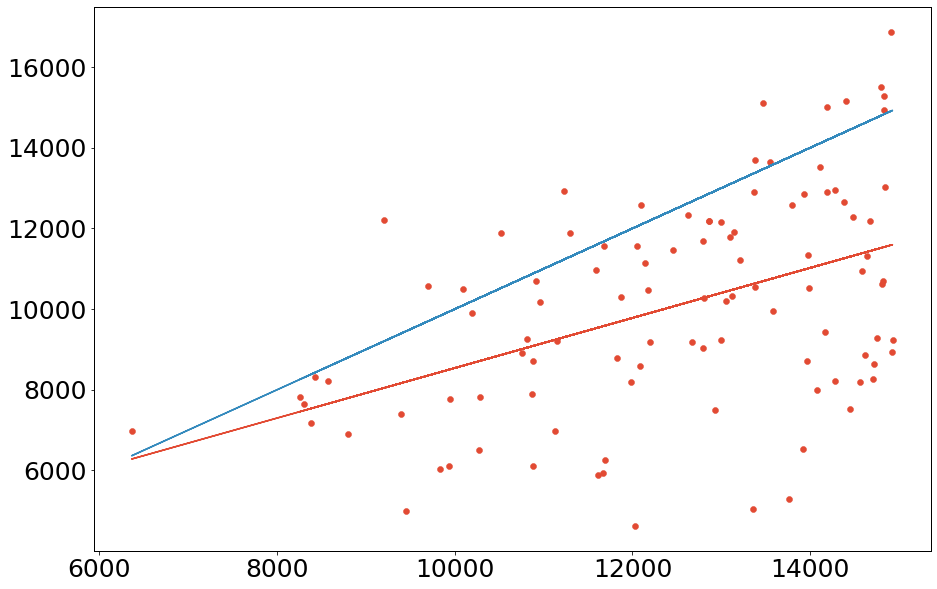

In [9]:
plt.scatter(pred, real)
m, b = np.polyfit(np.array(pred), np.array(real), 1)
plt.plot(np.array(pred), m*np.array(pred) + b)
plt.plot(np.array(pred), 1*np.array(pred) + 0)
print ("slop is ", m)
print ("b is ", b)